<a href="https://colab.research.google.com/github/gulnaranocetti/APIs/blob/main/Lab3_Sesgo_Varianza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico 3 - Sesgo & Varianza

## Imports

In [ ]:
import numpy as np
np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)})

# Visualizations
import matplotlib.pyplot as plt

# Machine learning
import sklearn

# Regression
from sklearn.linear_model import LinearRegression

# Preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import mean_squared_error

# Data analysis and manipulation
import pandas as pd
pd.set_option('display.precision', 5) # 5 decimales

## MSE verdadero vs. MSE en test

### Función de regresión verdadera

Vamos a trabajar con el ejemplo del rendimiento medio del cultivo de papas en función de la lluvia.

Lo haremos con los datos de lluvia normalizados a $[0,1]$.

Supongamos que la verdadera función de regresión (rendimiento medio) es $f:[0,1]\to\mathbb{R}$ dada por:

$$f(x) = -40.425 x^2 + 58.450 x +9.175$$

Por lo tanto el rendimiento individual viene dado por el modelo

$$y = f(x) + \epsilon$$

donde $\epsilon$ indica ruido que suponemos normalmente distribuido, con media = 0 y varianza = 2.

Vamos a suponer que $x$ está distribuida uniformemente en $[0,1]$.

Estos supuestos son desconocidos en la práctica real, pero nos servirán para evaluar las técnicas de selección de modelos.

In [ ]:
# Función verdadera
A = -40.425
B = 58.45
C = 9.175

def f(x):
    return A*(x**2) + B*x + C

In [ ]:
# Error irreducible
sigma_epsilon = np.sqrt(2)

### Datos originales

Suponemos también que tenemos los siguientes datos:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Nuestro dataset de base S - cambiar ruta del archivo
papas = pd.read_csv('/content/drive/MyDrive/Clases FING/Modelos 2025/P3/Papas.csv')
papas

,Lluvia,Rendimiento
0,206,29
1,188,25
2,219,31
3,372,25
4,345,29
5,231,30
6,203,26
7,170,23
8,55,12
9,91,15


In [ ]:
# Cambiamos las unidades de Lluvia para disminuir errores numéricos
papas['Lluvia'] = (papas['Lluvia']-50)/350

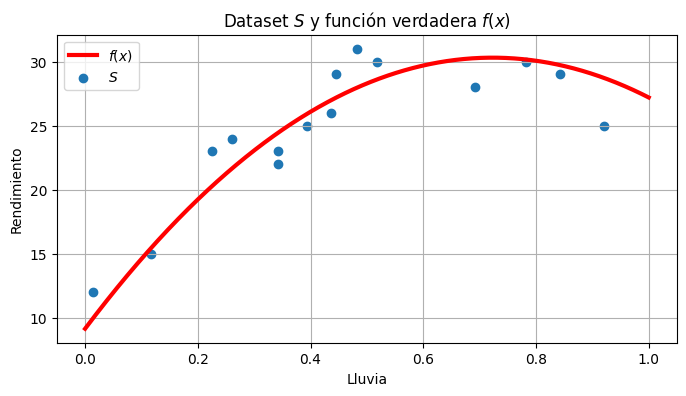

In [ ]:
plt.figure(figsize=(8, 4))
x_range = np.linspace(0, 1, 1000)
plt.plot(x_range, f(x_range), 'r', linewidth=3.0)

plt.scatter(x = 'Lluvia',
            y = 'Rendimiento',
            data=papas
           )
plt.xlabel('Lluvia')
plt.ylabel('Rendimiento')
plt.title(r'Dataset $S$ y función verdadera $f(x)$')
plt.legend([r'$f(x)$', r'$S$'])
plt.grid(True)

plt.show()

In [ ]:
# Pasamos a numpy para trabajar con sklearn
X = np.array(papas['Lluvia']).reshape(-1, 1)
y = np.array(papas['Rendimiento']).reshape(-1, 1)

### Datos de test

Suponemos también que disponemos de los siguientes datos de test:

In [ ]:
# Nuestro dataset de test Stest - cambiar ruta del archivo
test = pd.read_csv('/content/drive/MyDrive/Clases FING/Modelos 2025/P3/Test.csv')
test

,Lluvia,Rendimiento
0,213,30
1,80,16
2,391,25
3,250,26
4,57,9
5,303,28
6,263,28
7,157,25
8,72,13
9,157,23


In [ ]:
# Cambiamos las unidades de Lluvia para disminuir errores numéricos
test['Lluvia'] = (test['Lluvia']-50)/350
test

,Lluvia,Rendimiento
0,0.46571,30
1,0.08571,16
2,0.97429,25
3,0.57143,26
4,0.02000,9
5,0.72286,28
6,0.60857,28
7,0.30571,25
8,0.06286,13
9,0.30571,23


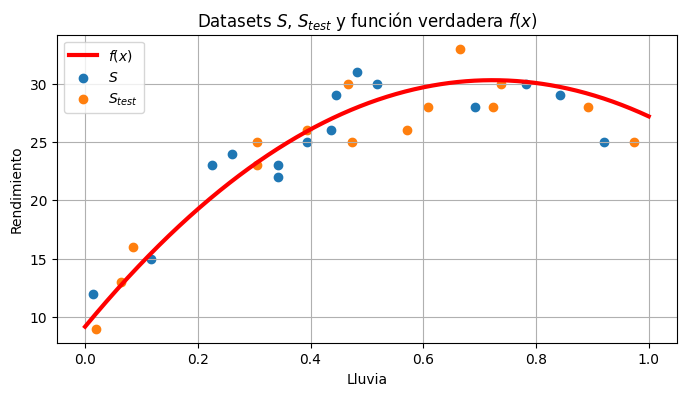

In [ ]:
plt.figure(figsize=(8, 4))
x_range = np.linspace(0, 1, 1000)
plt.plot(x_range, f(x_range), 'r', linewidth=3.0)

plt.scatter(x = 'Lluvia',
            y = 'Rendimiento',
            data=papas
           )
plt.scatter(x = 'Lluvia',
            y = 'Rendimiento',
            data=test
           )
plt.xlabel('Lluvia')
plt.ylabel('Rendimiento')
plt.title(r'Datasets $S$, $S_{test}$ y función verdadera $f(x)$')
plt.legend([r'$f(x)$', r'$S$',r'$S_{test}$'])
plt.grid(True)

plt.show()

In [ ]:
# Pasamos a numpy para trabajar con sklearn
X_test = np.array(test['Lluvia']).reshape(-1, 1)
y_test = np.array(test['Rendimiento']).reshape(-1, 1)

### Regresión lineal simple

#### Entrenamiento

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
y_hat_S = lin_reg.predict(X)

In [ ]:
#RMSE
RootMSE_S = np.sqrt(mean_squared_error(y,y_hat_S))
RootMSE_S

np.float64(3.5749828297831923)

#### Gráfico del modelo obtenido

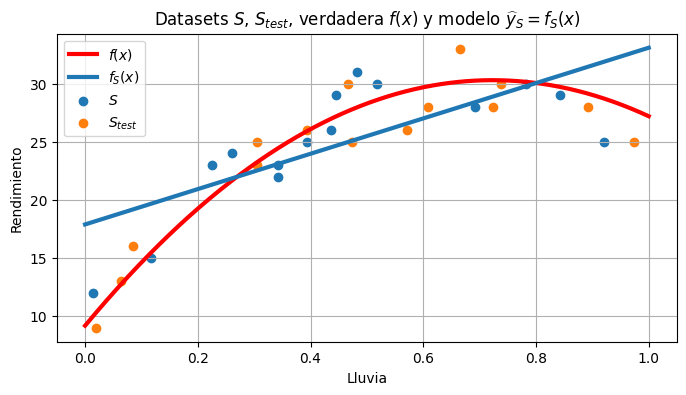

In [ ]:
plt.figure(figsize=(8, 4))

x_range = np.linspace(0, 1, 1000)
X_range = x_range.reshape(-1, 1)
y_hat_S = lin_reg.predict(X_range)

plt.plot(x_range, f(x_range), 'r', linewidth=3.0)
plt.plot(X_range, y_hat_S, 'tab:blue' , linewidth=3.0)

plt.scatter(x = 'Lluvia',
            y = 'Rendimiento',
            data=papas
           )
plt.scatter(x = 'Lluvia',
            y = 'Rendimiento',
8            data=test
           )
plt.xlabel('Lluvia')
plt.ylabel('Rendimiento')
plt.title(r'Datasets $S$, $S_{test}$, verdadera $f(x)$ y modelo $\widehat{y}_S=f_{S}(x)$')
plt.legend([r'$f(x)$', r'$f_S(x)$', r'$S$',r'$S_{test}$'])
plt.grid(True)

plt.show()

#### MSE verdadera

Como conocemos la distribución $D$ de los datos podemos calcular el error verdadero

$$\text{MSE}(f_S)=\mathbb{E}_{(x,y)\sim D}\Big[(y-f_S(x))^2\Big]$$

Esto es imposible en la práctica real.

In [ ]:
# Coeficientes de f_S
w0 = lin_reg.intercept_[0]
w1 = lin_reg.coef_[0][0]
print(w0,w1)

17.88847492036507 15.207672534821207


Denotamos $f(x)=Ax^2+Bx + C$ la función de regresión verdadera.

El error verdadero del modelo $f_S(x)=w_0+w_1 x$ es

$$
\begin{aligned}
\text{MSE}(f_S)
& = \mathbb{E}_{(x,y)\sim D}\Big[(y-f_S(x))^2\Big]\\
& = \mathbb{E}_{(x,\epsilon)}\Big[(f(x)+\epsilon-f_S(x))^2\Big]\\
& = \mathbb{E}_{(x,\epsilon)}\Big[(Ax^2 + Bx + C +\epsilon-w_0-w_1 x)^2\Big]\\
\end{aligned}
$$

Juntando los coeficientes en las potencias de $x$ y desarrollando el cuadrado llegamos a la expresión

$$
\begin{aligned}
\text{MSE}(f_S)
& =
\sigma^2+A^2\mathbb{E}[x^4]\\
& + 2 A (B-w_1) \mathbb{E}[x^3]\\
& + ((B-w_1)^2+2 A (C-w_0))\mathbb{E}[x^2]\\
& + 2 (B-w_1)(C-w_0)\mathbb{E}[x]\\
& + (C-w_0)^2
\end{aligned}
$$

en donde aparecen los momentos de la distribución uniforme en $[0,1]$.

Los momentos de la distribución uniforme en $[a,b]$ están dados por:

$$\mathbb{E}[x^n]=\frac{b^{n+1}-a^{n+1}}{(n+1)(b-a)}$$

por lo que para la uniforme en $[0,1]$ tenemos $\mathbb{E}[x^n]=1/(n+1)$.

In [ ]:
# Momentos de la uniforme
exp_x = 1/2
exp_x2 = 1/3
exp_x3 = 1/4
exp_x4 = 1/5

In [ ]:
e0 = (C-w0)**
e1 = 2*(B-w1)*(C-w0)*exp_x
e2 = ((B-w1)**2+2*A*(C-w0))*exp_x2
e3 = 2*A*(B-w1)*exp_x3
e4 = (A**2)*exp_x4

MSE = sigma_epsilon**2 + e0 + e1 + e2 + e3 + e4

In [ ]:
RootMSE = np.sqrt(MSE)
RootMSE

np.float64(3.473048766950021)

#### Error en test

Como en la práctica no conocemos la distribución $D$, estimamos el error verdadero

$$\text{MSE}_{S_{test}}(f_S)=\frac{1}{|S_{test}|}\sum_{(x,y)\in S_{test}}(y-f_S(x))^2$$

Aquí $S_{test}$ es una muestra de $D$ independiente de $S$.

In [ ]:
# Predicción en test
y_hat_Stest = lin_reg.predict(X_test)

In [ ]:
# Error en test
RootMSE_Stest = np.sqrt(mean_squared_error(y_test,y_hat_Stest))
RootMSE_Stest

np.float64(4.192642796456985)

### Regresión lineal con polinomios

#### Entrenamiento

In [ ]:
# Entrenamos regresiones polinomiales para varios grados
# Guardamos la info necesaria para predecir en test posteriormente
modelos = []
scalers = []
polys = []
M = []
STD = []
norm_intercepts = []
norm_coefs = []

# Grado máximo de los polinomios
grado_max = 6

for grado in range(1,grado_max+1):
    poly = PolynomialFeatures(degree=grado, include_bias=False)
    poly.fit(X)
    polys.append(poly)
    X_poly = poly.transform(X)
    m = np.mean(X_poly,axis=0)
    std= np.std(X_poly, axis=0)

    M.append(m)
    STD.append(std)

    scaler = StandardScaler()
    X_norm = scaler.fit_transform(X_poly)
    scalers.append(scaler)

    poly_reg = LinearRegression()
    poly_reg.fit(X_norm, y)
    modelos.append(poly_reg)

    norm_intercepts.append(poly_reg.intercept_[0])
    norm_coefs.append(poly_reg.coef_[0])

In [ ]:
# Desnormalizamos los coeficientes
intercepts = []
coefs = []

for k in range(len(norm_coefs)):
    beta0 = norm_intercepts[k]
    beta = norm_coefs[k]
    m = M[k]
    std = STD[k]
    intercepts.append(beta0 - np.sum(m*beta/std))
    coefs.append(beta/std)

#### Error en train, en test y verdadero

In [ ]:
# Calculamos los MSE en train, test y verdadero con el objetivo de graficarlos
MSEs = []
MSEs_S = []
MSEs_Stest = []
momentos = [1/(n+1) for n in range(2*max(grado_max,2)+1)]

for k in range(len(modelos)):
    # Coeficientes
    w0 = np.array([intercepts[k]])
    w1 = coefs[k]
    w = np.concatenate((w0,w1))
    if len(w) == 2:
        polinomio = np.concatenate((w,np.zeros(1)))-np.array([C,B,A])
    elif len(w) == 3:
        polinomio = w-np.array([C,B,A])
    else:
        polinomio = w-np.concatenate((np.array([C,B,A]),np.zeros(len(w)-3)))

    # MSE verdadero
    terminos = []
    for i in range(len(polinomio)):
        for j in range(len(polinomio)):
            terminos.append(polinomio[i]*polinomio[j]*momentos[i+j])
    MSEs.append(sigma_epsilon**2+sum(terminos))

    # Modelo y transformaciones
    f_S = modelos[k]
    poly = polys[k]
    scaler = scalers[k]

    # MSE en train
    X_poly = poly.transform(X)
    X_norm = scaler.transform(X_poly)
    y_hat_S = f_S.predict(X_norm)
    MSEs_S.append(mean_squared_error(y,y_hat_S))

    # MSE en test
    X_test_poly = poly.transform(X_test)
    X_test_norm = scaler.transform(X_test_poly)
    y_hat_Stest = f_S.predict(X_test_norm)
    MSEs_Stest.append(mean_squared_error(y_test,y_hat_Stest))

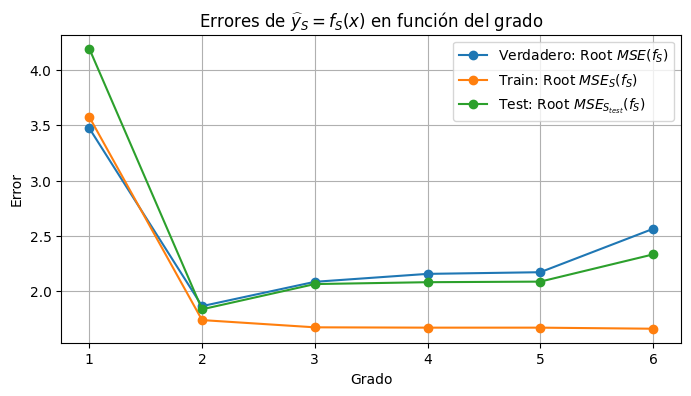

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(1,grado_max+1),np.sqrt(MSEs), '-o')
plt.plot(range(1,grado_max+1),np.sqrt(MSEs_S), '-o')
plt.plot(range(1,grado_max+1),np.sqrt(MSEs_Stest), '-o')
plt.xlabel('Grado')
plt.ylabel('Error')
plt.title(r'Errores de $\widehat{y}_S=f_{S}(x)$ en función del grado')
plt.legend([r'Verdadero: Root $MSE(f_S)$',r'Train: Root $MSE_S(f_S)$',r'Test: Root $MSE_{S_{test}}(f_S)$'])
plt.grid(True)
plt.show()

Notar que $MSE$ es bien aproximada por $MSE_{S_{test}}$.

## Visualización del sesgo y la varianza

En este experimento simulamos datos a partir de una **función verdadera** $f(x)$ con ruido. Luego:

1. Generamos **muchos datasets distintos** (con diferentes muestras de ruido).  
2. Para cada dataset, entrenamos un **modelo polinomial** de grado $d=1,2,3,4,5$.  
3. Para cada grado $d$ calculamos:  
   - La **predicción promedio** de todos los modelos (para estimar $\mathbb{E}_S[f_S(x)]$ y visualizar el **sesgo**).  
   - La **variabilidad** de los modelos alrededor del promedio (que estima $Var_S(f_S(x))$ y refleja la **varianza**).  

En los gráficos:  
- La **línea roja punteada** representa la función verdadera $f(x)$.  
- La **línea verde** es el promedio de los modelos entrenados.  
- La **franja verde sombreada** muestra la varianza de las predicciones.  

Así podemos observar cómo el **grado del polinomio** afecta el balance entre **sesgo** (qué tan lejos está la predicción promedio de la realidad) y **varianza** (qué tan inestables son los modelos entre sí).


In [ ]:
# Definimos nuestro modelo polinomial usando Numpy porque es más rápido
def h(x, w):
    d = len(w) - 1
    return np.sum(w * np.power(x, np.expand_dims(np.arange(d, -1, -1), 1)).T, 1)

In [ ]:
# Vamos a generar varias hipótesis polinomiales con una fracción de los datos
n = 15

# Definimos el rango de valores de x
x_range = np.linspace(0, 1, 1000)

# Definimos los grados de los polinomios
d_arr = range(1,6)

# Cantidad R de datasets
R = 10000

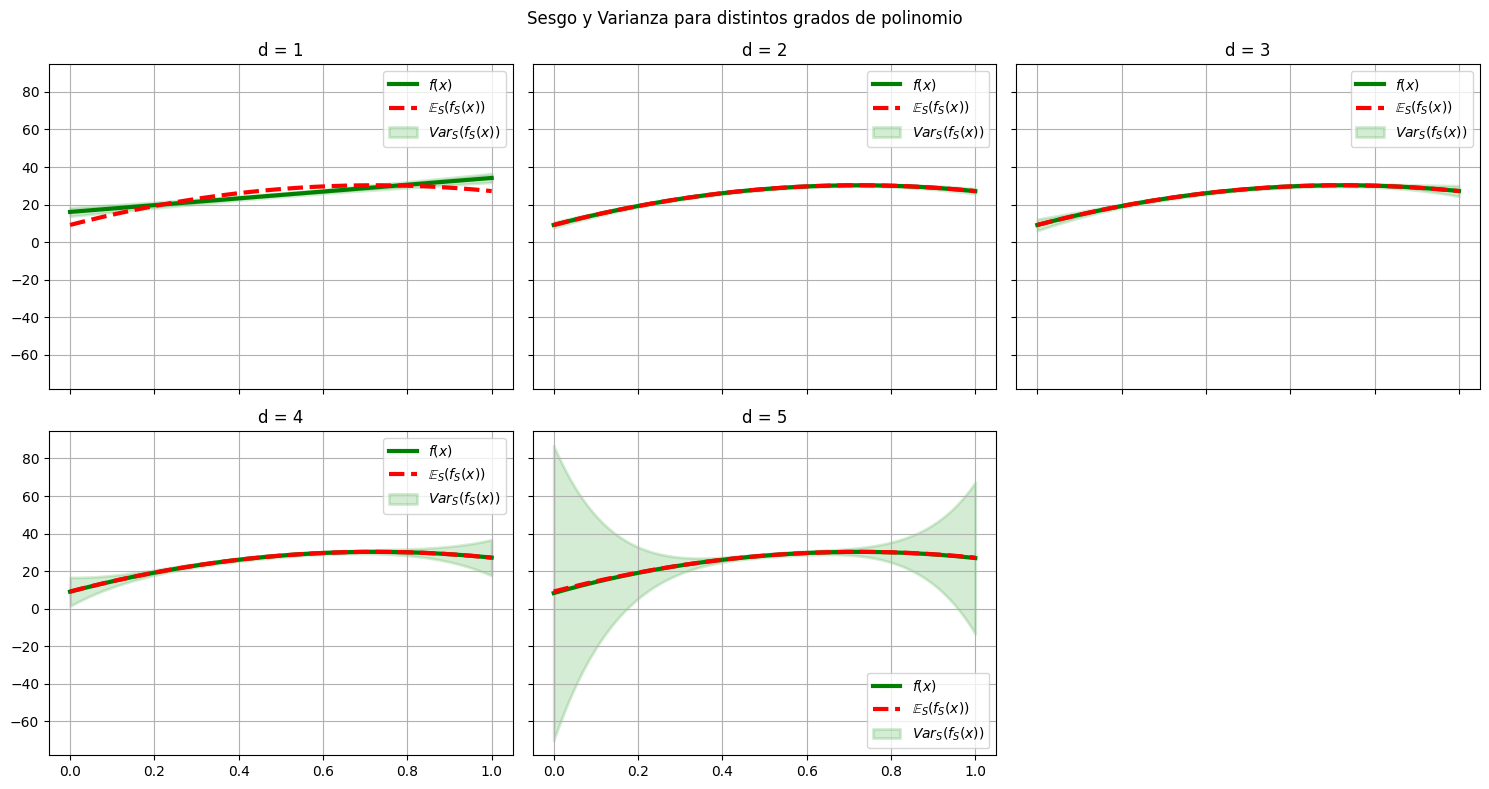

In [ ]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15, 8))
axs = axs.flatten()  # Para poder indexar fácilmente con un solo índice

for k in range(5):  # d = 1 a 5
    models = np.zeros((R, len(x_range)))
    for r in range(R):
        # Vector de valores de x (uniforme)
        x_train = np.random.rand(n)

        # Ruido gaussiano
        epsilon = sigma_epsilon * np.random.randn(n)

        # Función verdadera + ruido
        y_train = f(x_train) + epsilon

        d = d_arr[k]
        w = np.polyfit(x_train, y_train, d)
        models[r, :] = h(x_range, w)

    # Media de los modelos
    axs[k].plot(x_range, np.mean(models, axis=0), 'g', linewidth=3.0)

    # Función verdadera
    axs[k].plot(x_range, f(x_range), 'r--', linewidth=3.0)

    # Varianza
    axs[k].fill_between(
        x_range,
        np.mean(models, axis=0) - np.std(models, axis=0),
        np.mean(models, axis=0) + np.std(models, axis=0),
        alpha=0.2,
        color="tab:green",
        lw=2,
    )

    # Leyenda y título
    axs[k].legend([r'$f(x)$', r'$\mathbb{E}_S(f_S(x))$', r'$Var_{S}(f_S(x))$'])
    axs[k].grid(True)
    axs[k].set_title('d = {}'.format(d_arr[k]))

# Quitamos el último subplot vacío (si hay alguno)
for ax in axs[5:]:
    ax.axis('off')

plt.xlabel('Lluvia')
plt.ylabel('Rendimiento')
plt.suptitle('Sesgo y Varianza para distintos grados de polinomio')
plt.tight_layout()
plt.show()


¿Qué podemos observar?
